In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Derive text features on tissues

In [2]:
from wsidata import open_wsi
import lazyslide as zs

In [3]:
wsi = open_wsi("https://brd.nci.nih.gov/brd/imagedownload/GTEX-1117F-1626")

In [ ]:
wsi

## Available models

Currently, there are two vision-language models for pathology
- [PLIP](https://doi.org/10.1038/s41591-023-02504-3), Nature Medicine, 2023
- [CONCH](https://doi.org/10.1038/s41591-024-02856-4), Nature Medicine, 2024

To embed text features into WSI, we first need to create vision features for these models

In [5]:
zs.tl.feature_extraction(wsi, 'plip')

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Output()

In [9]:
texts = ["mucosa", "submucosa"]
embeddings = zs.tl.text_embedding(texts, model="plip")

In [10]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
mucosa,-0.022973,0.025480,0.028441,0.005866,-0.024645,0.033594,-0.050241,-0.082467,0.013853,0.030659,...,-0.013886,-0.020203,-0.049290,-0.023587,0.010461,0.015678,-0.004766,-0.026021,0.002830,0.060166
submucosa,-0.035914,0.013462,0.025821,-0.022369,-0.031351,0.022991,0.024857,0.001826,0.012294,0.026527,...,-0.023135,-0.024252,-0.032243,-0.011307,-0.010145,0.014115,-0.008943,-0.075471,0.009379,0.031478


In [21]:
zs.tl.text_annotate(wsi, embeddings)

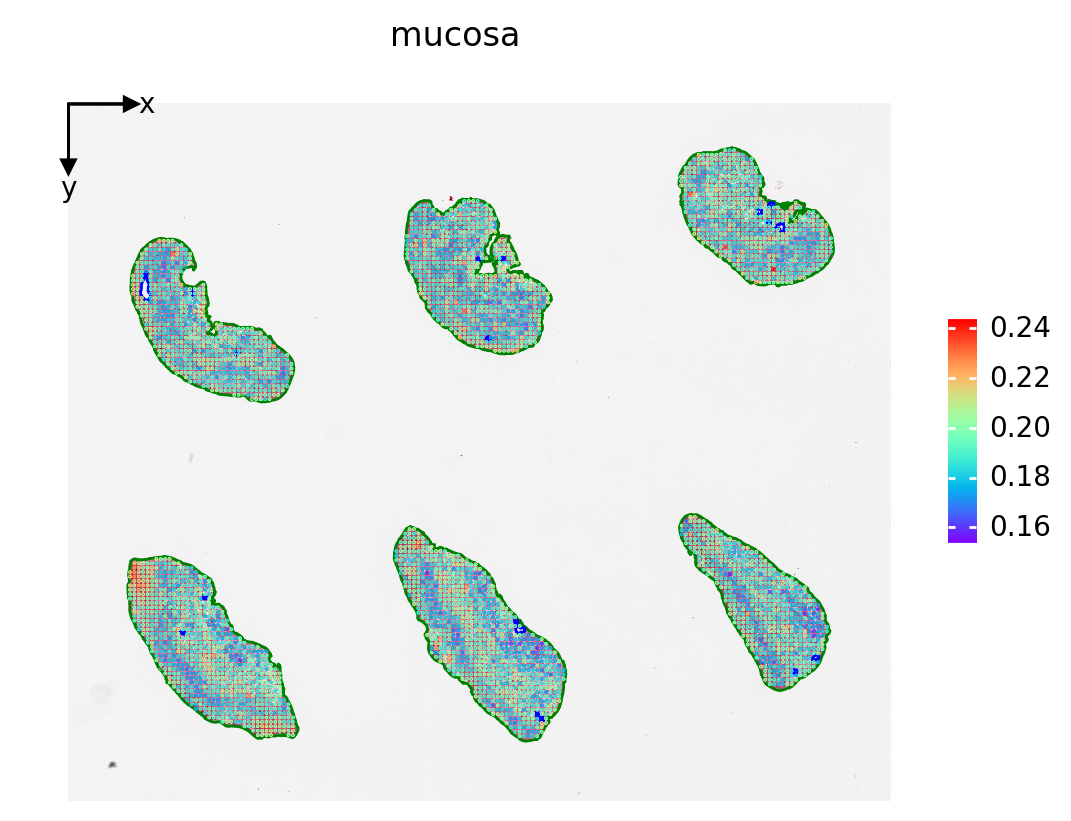

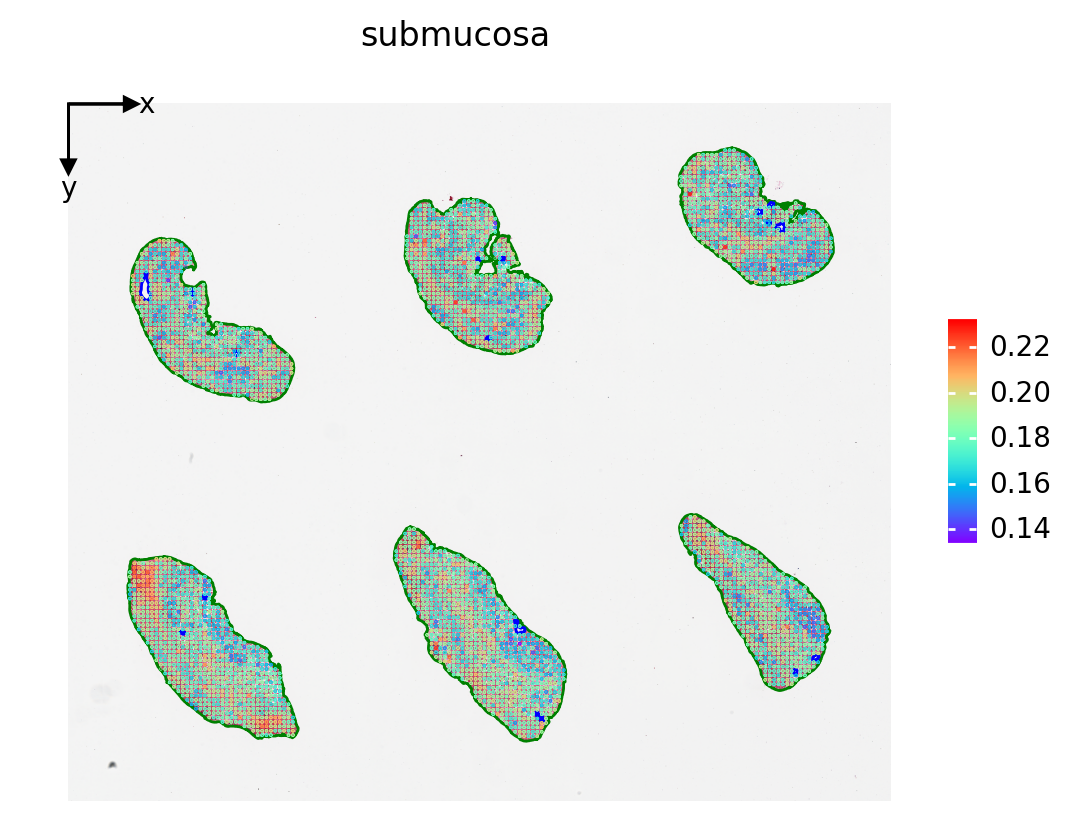

In [27]:
zs.pl.tiles(wsi, color="mucosa")
zs.pl.tiles(wsi, color="submucosa")